# Pointilism algorithm work

## Import class definitions

In [59]:
from pointillism import pointillize, pointillizeStack, pointillizePile
%run pointillism.py

# Implementing Gausian instead of complexity function

## Profiling base case

In [141]:
%run pointillism.py

images/pfieffer.jpg


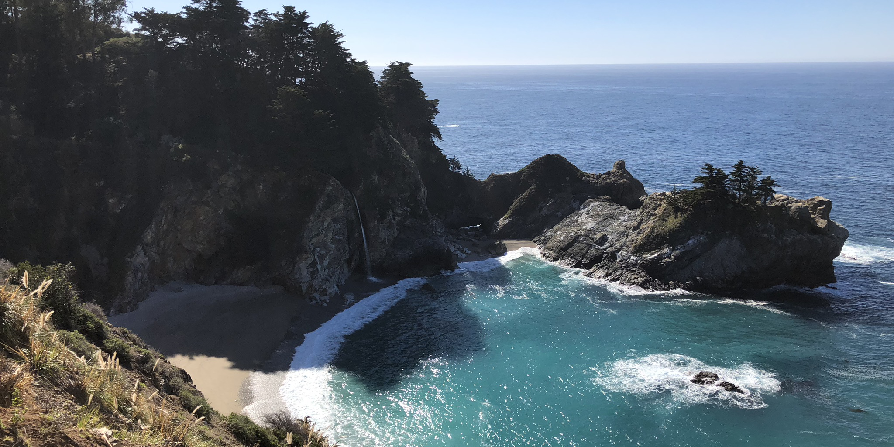

In [146]:
# Create instance on directory or filename
point = pointillize(location='images/pfieffer.jpg', debug = True)

# Crop
point.crop_Y([1000,500], False)
point.display(original=True)

In [147]:
then = time.time()
point._makeProbabilityMask(0.01, power = 1.3)
print('took %0.2f seconds' %(time.time() - then))

took 1.23 seconds


In [148]:
%prun point.plotRandomPointsComplexity(n=4e4, constant=0.015, power=1.3, alpha='currently_hardcoded')  

plotRandomPointsComplexity: done...took 34.45 sec
 

In [221]:
result = """  
    
    16400078 function calls in 34.163 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1200000    8.724    0.000    8.724    0.000 {built-in method numpy.core.multiarray.array}
    40000    4.020    0.000   17.108    0.000 pointillism.py:241(_getComplexityOfPixel)
   360000    3.313    0.000   16.992    0.000 index_tricks.py:26(ix_)
    40000    2.623    0.000   10.773    0.000 pointillism.py:151(_getColorOfPixel)
   360000    2.166    0.000    2.166    0.000 {method 'reduce' of 'numpy.ufunc' objects}
    40000    1.731    0.000    1.731    0.000 {method 'draw_ellipse' of 'ImagingDraw' objects}
  3480000    1.354    0.000    1.354    0.000 {built-in method builtins.issubclass}
  1080000    1.241    0.000    3.616    0.000 numerictypes.py:699(issubdtype)
  2160000    1.073    0.000    2.222    0.000 numerictypes.py:631(issubclass_)
  1080000    0.854    0.000    0.854    0.000 {method 'reshape' of 'numpy.ndarray' objects}
    40000    0.783    0.000    0.783    0.000 {method 'paste' of 'ImagingCore' objects}
   120000    0.715    0.000    2.194    0.000 _methods.py:53(_mean)
        1    0.632    0.632   34.163   34.163 pointillism.py:281(plotRandomPointsComplexity)
    40000    0.523    0.000   15.977    0.000 pointillism.py:173(_plotColorPoint)
   120000    0.411    0.000    0.435    0.000 _methods.py:43(_count_reduce_items)
  1080000    0.368    0.000    9.014    0.000 numeric.py:424(asarray)
    40000    0.290    0.000    0.290    0.000 pointillism.py:276(_getRadiusFromComplexity)
    40000    0.261    0.000    0.261    0.000 {built-in method PIL._imaging.fill}
    40000    0.254    0.000    1.327    0.000 Image.py:1327(paste)
    40000    0.223    0.000    1.001    0.000 Image.py:2266(new)
   320001    0.202    0.000    0.202    0.000 {built-in method builtins.hasattr}
    40000    0.187    0.000    0.304    0.000 ImageDraw.py:48(__init__)
    80000    0.170    0.000    0.170    0.000 Image.py:519(__init__)
  1240000    0.149    0.000    0.149    0.000 {method 'append' of 'list' objects}
   160000    0.141    0.000    0.193    0.000 Image.py:794(load)
    40000    0.140    0.000    0.220    0.000 Image.py:539(_new)
   400004    0.131    0.000    0.131    0.000 {built-in method builtins.isinstance}
   120000    0.128    0.000    2.322    0.000 {method 'mean' of 'numpy.ndarray' objects}
   120000    0.122    0.000    0.932    0.000 {method 'max' of 'numpy.ndarray' objects}
    40000    0.117    0.000    0.422    0.000 ImageDraw.py:277(Draw)
   120000    0.111    0.000    0.832    0.000 {method 'min' of 'numpy.ndarray' objects}
   600000    0.109    0.000    0.109    0.000 {built-in method builtins.len}
   160000    0.083    0.000    0.083    0.000 {built-in method builtins.max}
    40000    0.070    0.000    1.918    0.000 ImageDraw.py:144(ellipse)
    80000    0.065    0.000    0.152    0.000 Image.py:586(__del__)
    40000    0.063    0.000    0.089    0.000 Image.py:2248(_check_size)
   120000    0.062    0.000    0.810    0.000 _methods.py:25(_amax)
   120000    0.059    0.000    0.721    0.000 _methods.py:28(_amin)
    40000    0.058    0.000    0.117    0.000 ImageDraw.py:100(_getink)
   160000    0.052    0.000    0.052    0.000 {method 'pixel_access' of 'ImagingCore' objects}
   160000    0.052    0.000    0.052    0.000 {built-in method builtins.min}
    80000    0.051    0.000    0.051    0.000 {method 'draw_ink' of 'ImagingDraw' objects}
   120000    0.049    0.000    0.085    0.000 _util.py:10(isStringType)
   120000    0.048    0.000    0.126    0.000 numeric.py:495(asanyarray)
   120000    0.044    0.000    0.106    0.000 Image.py:140(isImageType)
    40000    0.025    0.000    0.061    0.000 Image.py:598(_ensure_mutable)
"""

images/pfieffer.jpg


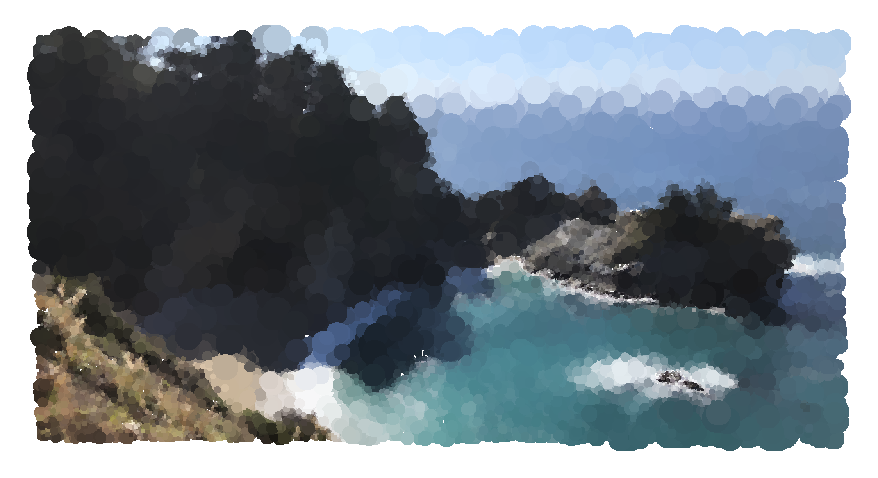

In [149]:
point.display()

## Profiling with new gradient complexity

In [215]:
%run pointillism.py

In [216]:
# Create instance on directory or filename
point = pointillize(location='images/pfieffer.jpg', debug = True, border=0)

# Crop
point.crop_Y([1000,500], False)

In [325]:
point._makeComplexityArray(1,10,0.5)

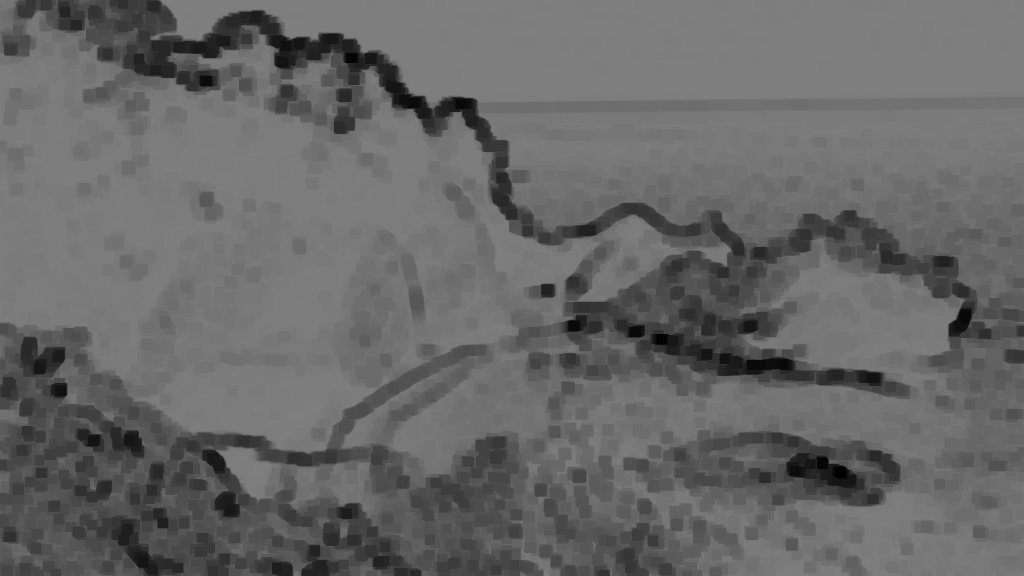

In [326]:
Image.fromarray((point.array_complexity*255).astype('uint8'))

In [219]:
point._newImage(point.border)
%prun point.plotRandomPointsComplexity(n=4e4, constant=0.015, power=1.3, use_gradient=True)

plotRandomPointsComplexity: done...took 16.66 sec
 

In [222]:
results = """
    
    7721272 function calls in 16.761 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   480113    3.157    0.000    3.157    0.000 {built-in method numpy.core.multiarray.array}
    40000    2.497    0.000   10.969    0.000 pointillism.py:159(_getColorOfPixel)
    40000    1.530    0.000    1.530    0.000 {method 'draw_ellipse' of 'ImagingDraw' objects}
   120000    1.197    0.000    6.123    0.000 index_tricks.py:26(ix_)
   120014    0.779    0.000    0.779    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   120000    0.686    0.000    2.140    0.000 _methods.py:53(_mean)
        1    0.595    0.595   16.761   16.761 pointillism.py:289(plotRandomPointsComplexity)
    40000    0.520    0.000    0.520    0.000 {method 'paste' of 'ImagingCore' objects}
  1320083    0.515    0.000    0.515    0.000 {built-in method builtins.issubclass}
    40000    0.490    0.000   15.505    0.000 pointillism.py:181(_plotColorPoint)
   360000    0.461    0.000    1.319    0.000 numerictypes.py:699(issubdtype)
    40000    0.421    0.000    0.421    0.000 pointillism.py:284(_getRadiusFromComplexity)
   120000    0.395    0.000    0.419    0.000 _methods.py:43(_count_reduce_items)
   720000    0.392    0.000    0.805    0.000 numerictypes.py:631(issubclass_)
   360006    0.320    0.000    0.320    0.000 {method 'reshape' of 'numpy.ndarray' objects}
    40000    0.245    0.000    1.045    0.000 Image.py:1327(paste)
    40000    0.224    0.000    0.224    0.000 {built-in method PIL._imaging.fill}
   320011    0.194    0.000    0.194    0.000 {built-in method builtins.hasattr}
    40000    0.192    0.000    0.895    0.000 Image.py:2266(new)
    40000    0.169    0.000    0.272    0.000 ImageDraw.py:48(__init__)
    80000    0.151    0.000    0.151    0.000 Image.py:519(__init__)
   360015    0.139    0.000    3.220    0.000 numeric.py:424(asarray)
   160000    0.133    0.000    0.181    0.000 Image.py:794(load)
    40000    0.130    0.000    0.205    0.000 Image.py:539(_new)
   120000    0.128    0.000    2.268    0.000 {method 'mean' of 'numpy.ndarray' objects}
   400036    0.124    0.000    0.124    0.000 {built-in method builtins.isinstance}
    40000    0.112    0.000    0.384    0.000 ImageDraw.py:277(Draw)
   520000    0.067    0.000    0.067    0.000 {method 'append' of 'list' objects}
    40000    0.064    0.000    1.709    0.000 ImageDraw.py:144(ellipse)
    40000    0.060    0.000    0.084    0.000 Image.py:2248(_check_size)
    80000    0.059    0.000    0.145    0.000 Image.py:586(__del__)
    40000    0.056    0.000    0.115    0.000 ImageDraw.py:100(_getink)
    80000    0.049    0.000    0.049    0.000 {method 'draw_ink' of 'ImagingDraw' objects}
   120008    0.048    0.000    0.124    0.000 numeric.py:495(asanyarray)
   280133    0.048    0.000    0.048    0.000 {built-in method builtins.len}
   160000    0.048    0.000    0.048    0.000 {method 'pixel_access' of 'ImagingCore' objects}
   120000    0.047    0.000    0.082    0.000 _util.py:10(isStringType)
    80038    0.043    0.000    0.043    0.000 {built-in method builtins.max}
   120000    0.042    0.000    0.103    0.000 Image.py:140(isImageType)
        4    0.037    0.009    0.037    0.009 {built-in method scipy.ndimage._nd_image.correlate1d}
    80034    0.027    0.000    0.027    0.000 {built-in method builtins.min}
        2    0.026    0.013    0.026    0.013 {built-in method scipy.ndimage._nd_image.min_or_max_filter1d}
        """

images/pfieffer.jpg


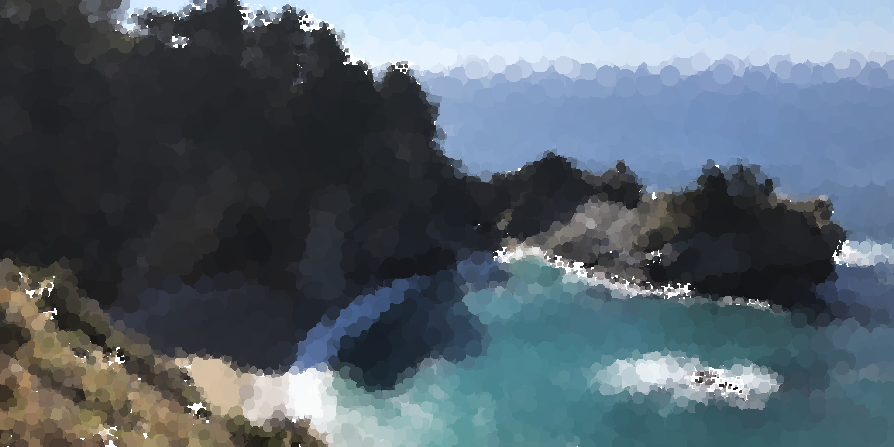

In [223]:
point.display()

# Test coverage plotting

In [235]:
%run pointillism.py

In [241]:
# Create instance on directory or filename
point = pointillize(location='images/pfieffer.jpg', debug=True, plot_coverage=True, use_coverage=True)

# Crop
point.crop_Y([1920,1080], False)

In [242]:
point.plotRecPoints(40,1,False)
point.plotRandomPointsComplexity(n=1e5, constant=0.04, power=3, alpha='currently_hardcoded', use_gradient=True, 
                                 grad_size=10, grad_mult=.5, min_size = 0.002)  

plotRecPoints: done...took 0.36 sec
plotRandomPointsComplexity: done...took 5.41 sec


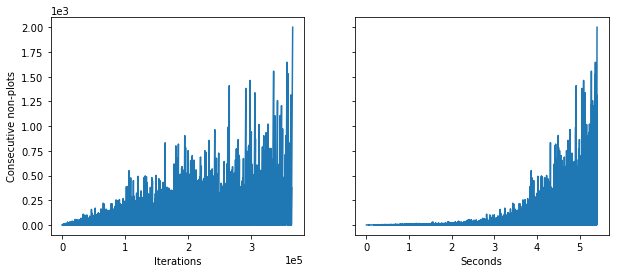

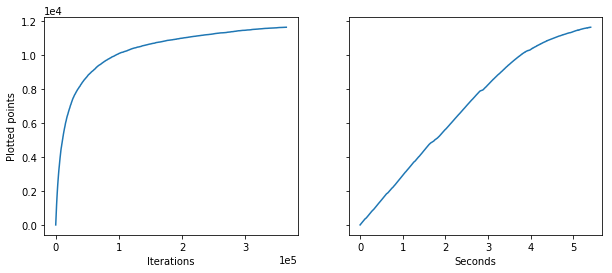

In [243]:
point._plotIterations()

images/pfieffer.jpg


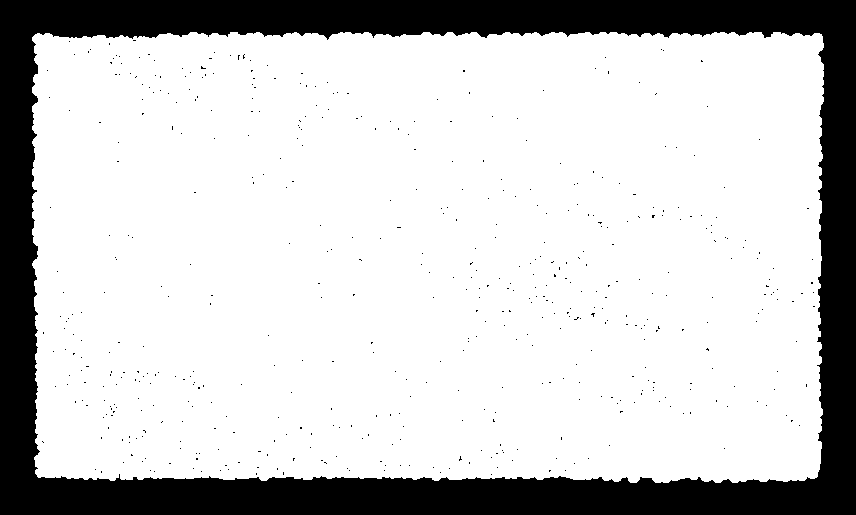

In [244]:
point.display(coverage=True)

images/pfieffer.jpg


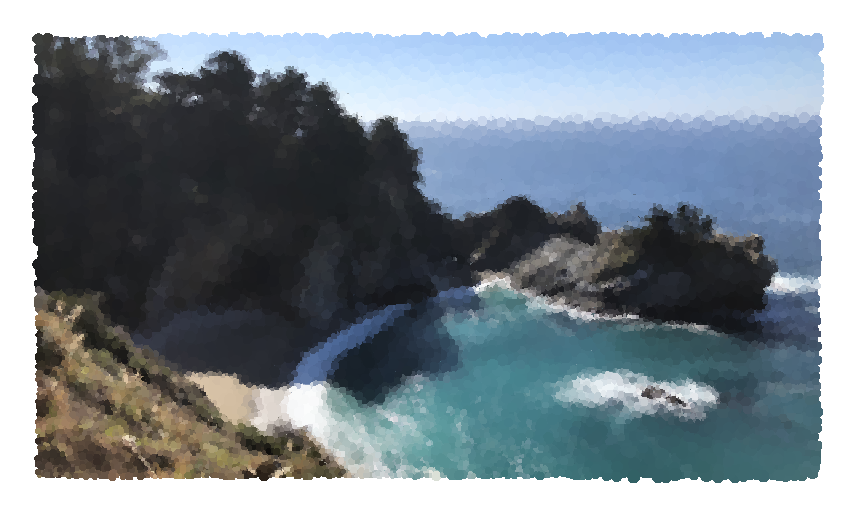

In [245]:
point.save_out(location='images_out/', suffix='cubed_basic_complexity')
point.display()

## Image adjustments

plotRecPoints: done...took 2.27 sec for 4263 points
plotRandomPointsComplexity: done...took 12.82 sec for 12159 points
images/pfieffer.jpg


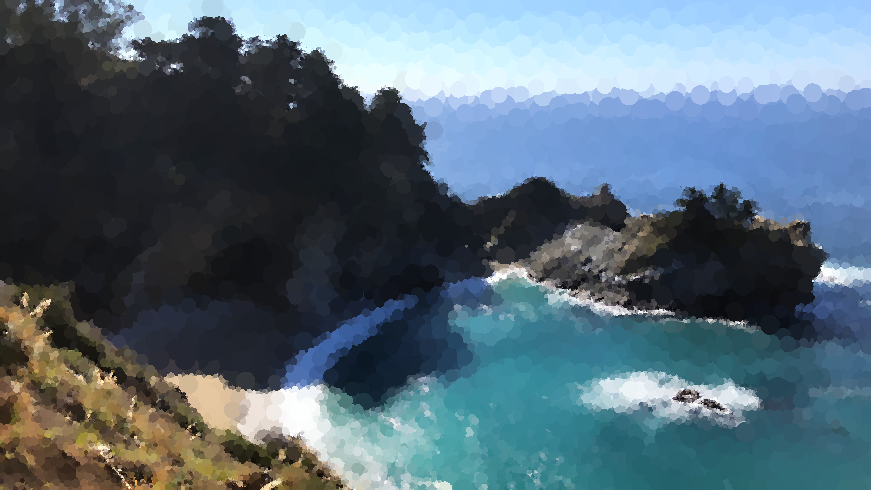

In [482]:
%run pointillism.py

# Create instance on directory or filename
point = pointillize(location='images/pfieffer.jpg', debug=True, plot_coverage=True, use_coverage=True, border=0)

# Crop
point.crop([1920,1080], False)

# Enhance
point.enhance(kind='color', amount=1.3)
point.enhance(kind='sharpness', amount=1.3)
point.enhance(kind='contrast', amount=1.1)
#point.display(original=True)


# Create image
point.plotRecPoints(100,1,False)
point.plotRandomPointsComplexity(n=1e5, constant=0.01, power=3, use_gradient=True, 
                                 grad_size=10, grad_mult=1, min_size = 0.001)  

# Display and save
point.save_out(location='images_out/', suffix='settings_experimentation_contrast')
point.display()

## Experimenting with alpha

plotRecPoints: done...took 1.94 sec for 4263 points
plotRandomPointsComplexity: done...took 21.40 sec for 28933 points


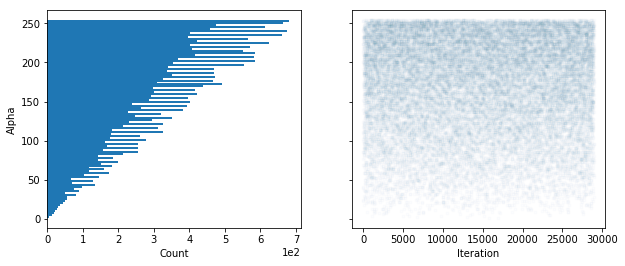

images/pfieffer.jpg


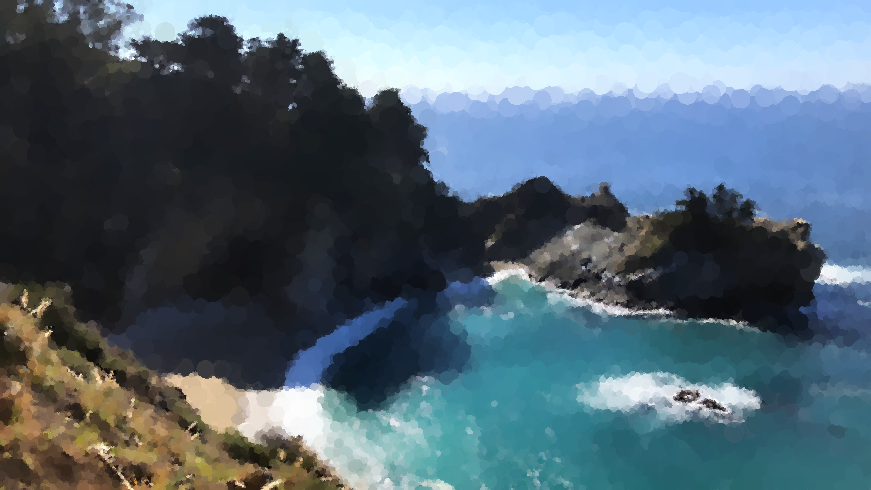

In [483]:
%run pointillism.py

# Create instance on directory or filename
point = pointillize(location='images/pfieffer.jpg', debug=True, plot_coverage=True, use_coverage=True, border=0)

# Crop
point.crop([1920,1080], False)

# Enhance
point.enhance(kind='color', amount=1.3)
point.enhance(kind='sharpness', amount=1.3)
point.enhance(kind='contrast', amount=1.1)
#point.display(original=True)

# Create image
point.plotRecPoints(100,1,False)
point.plotRandomPointsComplexity(n=1e5, constant=0.01, power=3, use_gradient=True, 
                                 grad_size=10, grad_mult=1, min_size = 0.001, 
                                 use_transparency=True, alpha_fcn=lambda: (random()**0.5)*255)  

# Show hist of complexity and bubble size
#point._plotComplexity()
#point._plotBubbleSize()

# Coverage 
#point._plotIterations()
#point.display(coverage=True)
#point.display(gradient=True)

# Show alpha
point._plotAlpha()

# Display and save
point.save_out(location='images_out/', suffix='transparency_experimentation')
point.display()

## Fixing min pixel size

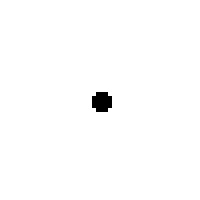

In [481]:
image = Image.new(size=(50, 50), mode='RGB', color='white')
loc = [25, 25]
border = 0
alpha = 255
color=(0,0,0)

r=2


new_layer = Image.new('RGBA', (int(3*r), int(3*r)), (0, 0, 0, 0))
draw = ImageDraw.Draw(new_layer)
draw.ellipse((0, 0, 2*r, 2*r),
             color + (alpha,))
image.paste(new_layer, (border + loc[0] - int(r),
                           border + loc[1] - int(r)),
               new_layer)
image.resize([200,200])

# iPhone live wallpaper

In [396]:
%run pointillism.py

point = pointillizeStack(location='images/pfieffer_vert.jpg', border = 0, debug=True, queue=True, 
                         plot_coverage=True, use_coverage=True, increase_factor=1)
point.crop([1125,2436], resize=True, direction='width')

point.plotRecPoints(100,1,False)
point.plotRandomPointsComplexity(n=1e5, constant=0.01, power=3, use_transparency=False, use_gradient=True, 
                                 grad_size=10, grad_mult=1, min_size = 0.001)  


plotRecPoints: done...took 0.86 sec
plotRandomPointsComplexity: done...took 3.74 sec


In [399]:

multipliers = [1, 1.1, 1.25, 1.5, 1.75, 2, 2.3, 2.6, 3, 3.5, 4.5, 6, 8, 12]
point.build_multipliers(multipliers, reverse=True,)

point.save_gif('gifs/iphone_pointqueue.gif',0.1)


Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 done


In [555]:
from IPython.display import HTML
HTML('<img src="gifs/iphone_pointqueue.gif" width=25%>')

# Tweaking settings for different photos to find good defaults

plotRecPoints: done...took 2.43 sec for 4263 points
plotRandomPointsComplexity: done...took 7.86 sec for 11613 points
images/pfieffer.jpg


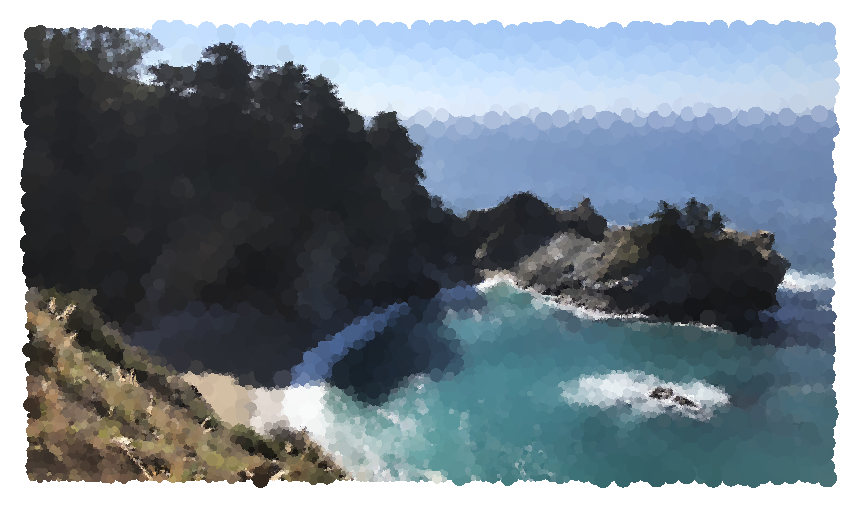

In [513]:
%run pointillism.py

# Create instance on directory or filename
point = pointillize(location='images/pfieffer.jpg', debug=True, plot_coverage=True, use_coverage=True, border=150)

# Crop
point.crop([1920,1080], False)


# Create image
point.plotRecPoints(100,1,False)
point.plotRandomPointsComplexity(n=1e5, constant=0.01, power=3, use_gradient=True, 
                                 grad_size=10, grad_mult=1, min_size = 0.001)  

# Show hist of complexity and bubble size
#point._plotComplexity()
#point._plotBubbleSize()

# Coverage 
#point._plotIterations()
#point.display(coverage=True)
#point.display(gradient=True)

# Display and save
point.save_out(location='images_out/', suffix='settings_experimentation')
point.display()

## Configuring common settings

done in 30.09 seconds
images/pfieffer.jpg


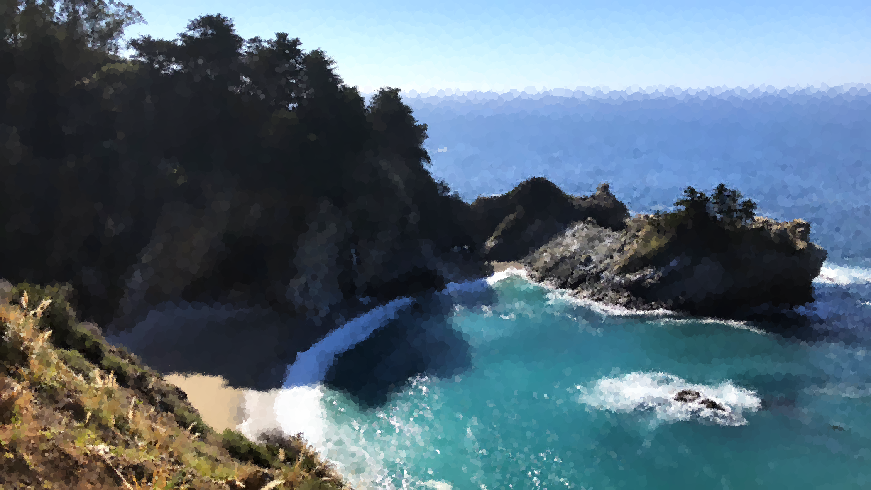

In [548]:
%run pointillism.py
# Create instance on directory or filename
point = pointillize(location='images/pfieffer.jpg', debug=True, border=0, increase_factor=2)

# Crop
point.crop([1920,1080], True)

# Enhance
point.enhance(kind='color', amount=1.3)
point.enhance(kind='sharpness', amount=1.3)
point.enhance(kind='contrast', amount=1.1)

# Run
point.plot('fine')

# Debug
#point._plotComplexity()
#point._plotBubbleSize()
#point._plotIterations()
#point._plotAlpha()
#point.display(coverage=True)

# Display and save
point.save_out(location='images_out/', suffix='settings_experimentation')
point.display()

In [541]:
%run pointillism.py

setting_list = ['uniform', 'coarse', 'balanced', 'fine', 'ultrafine']

for setting in setting_list:
    
    print(setting)
    
    # Create instance on directory
    point = pointillizePile(location='images_bulk/', debug = True, border = 0, increase_factor=1)

    # Crop and build queue
    point.new_queue()
    point.add_to_queue(point.crop,{'aspect': [1920,1080], 'resize': True}, 1)
    point.add_to_queue(point.plot,{'setting': setting}, 1)

    # Run and save
    point.run_pile_images(location = 'images_out', prefix = setting, suffix = 'settings_test')


uniform
Batch processing image: 1 2 3 4 5 6 7 8 9 10 11 done....took 46.96 seconds
coarse
Batch processing image: 1 2 3 4 5 6 7 8 9 10 11 done....took 23.66 seconds
balanced
Batch processing image: 1 2 3 4 5 6 7 8 9 10 11 done....took 48.76 seconds
fine
Batch processing image: 1 2 3 4 5 6 7 8 9 10 11 done....took 108.01 seconds
ultrafine
Batch processing image: 1 2 3 4 5 6 7 8 9 10 11 done....took 173.48 seconds


# Documentation

In [ ]:
# Help on module
import pointillism
help(pointillism)